In [263]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [279]:
with open('../witb_42.pkl', 'rb') as f:
    data = pickle.load(f)  # might be pickle.load()

In [285]:
path = r'/home/sasha/Documents/MilaPostDoc/Python/CommonCrawl/witb_results/'
pickles_list = [path+ f for f in os.listdir(path)]

In [293]:
alldf=pd.DataFrame(columns=['Adult_Ngrams', 'Hate_Ngrams', 'Hate_Sonar', 'Hate_Delimit','Offense_Sonar', 'Profanity_Ngrams', 'Perplexity'])

'Delimit'
'hate_speech':1
    'normal':0,

'Sonar':
'neither': 0,
'offensive_language': 1,
'hate_speech': 2

In [324]:
data_all = []
for pickle_file in pickles_list:
    data= pickle.load(open(pickle_file,'rb'))
    df = pd.DataFrame(columns=['Adult_Ngrams', 'Hate_Ngrams', 'Hate_Sonar', 'Hate_Delimit', 'Profanity_Ngrams', 'Perplexity'])
    df['Adult_Ngrams']= data['ngram']['pornography']
    df['Hate_Ngrams']= data['ngram']['hate-speech']
    df['Hate_Sonar']= [n[2] for n in data['sonar']]
    df['Hate_Delimit']= [n[1] for n in data['delimit']]
    df['Profanity_Ngrams']= data['ngram']['profanity']
    df['Perplexity']= data['perplexity'].astype(float)
    df['Perplexity'] = df['Perplexity'].replace(-np.inf, np.nan)
    #print(df.shape)
    data_all.append(df)

alldf = pd.concat(data_all, ignore_index=False)
print(alldf.shape)

(4108860, 6)


In [326]:
alldf.head()

,Adult_Ngrams,Hate_Ngrams,Hate_Sonar,Hate_Delimit,Profanity_Ngrams,Perplexity
0,0,0,0.0,0.0,12,363.7
1,1,0,0.0,0.0,3,551.1
2,0,1,0.0,0.0,13,538.4
3,0,0,0.0,0.0,3,722.7
4,0,0,0.0,0.0,2,461.8


In [336]:
alldf.shape

(4108860, 6)

In [364]:
alldf.query("0 < Adult_Ngrams").shape[0]/alldf.shape[0]*100

2.363867350067902

In [369]:
alldf.query("3 < Adult_Ngrams").shape[0]/alldf.shape[0]*100

1.1909386058420097

In [370]:
alldf.query("5 < Adult_Ngrams").shape[0]/alldf.shape[0]*100

0.9884736885656848

In [365]:
alldf.query("0 < Profanity_Ngrams").shape[0]/alldf.shape[0]*100

68.98251583164186

In [366]:
alldf.query("5 < Profanity_Ngrams").shape[0]/alldf.shape[0]*100

31.062046407032607

In [367]:
alldf.query("10 < Profanity_Ngrams").shape[0]/alldf.shape[0]*100

18.64741071732792

In [349]:
alldf.query("0 < Hate_Ngrams and 0 < Hate_Sonar and 0 < Hate_Delimit").shape[0]/alldf.shape[0]*100

0.23544243415448565

In [350]:
alldf.query("0 < Hate_Ngrams").shape[0]/alldf.shape[0]*100

17.781915178419318

In [351]:
alldf.query("0 < Hate_Sonar").shape[0]/alldf.shape[0]*100

4.0223078907531535

In [352]:
alldf.query("0 < Hate_Delimit").shape[0]/alldf.shape[0]*100

5.2454452086466805

In [354]:
alldf.query("0 < Hate_Ngrams and 0 < Hate_Sonar").shape[0]/alldf.shape[0]*100

1.8445992319037399

In [355]:
alldf.query("0 < Hate_Ngrams and 0 < Hate_Delimit").shape[0]/alldf.shape[0]*100

2.082134704029828

In [ ]:
voting schemes:
    - either one flags
    - all of them flag
    

In [ ]:
100 doc sample : look at 30 that they all flag, 30 that some of them, 40 that none

In [261]:
200/15000

0.013333333333333334

In [217]:
counto=0
for n in data['sonar']:
    counto+=1
    if n[1]  > n[0]:
        print(n)
        print(counto)

[19.         28.          5.          0.28089048  0.49504357  0.22406595]
150
[0.         3.         0.         0.16327537 0.7530995  0.08362513]
227
[19.         20.          8.          0.34352383  0.39352707  0.2629491 ]
247
[4.         7.         0.         0.26598002 0.66407523 0.06994475]
288
[ 3.         10.          0.          0.39726598  0.54407789  0.05865613]
330
[19.         26.          0.          0.35018037  0.587915    0.06190463]
624
[1.47000000e+02 2.10000000e+02 3.00000000e+00 3.26557267e-01
 6.11441958e-01 6.20007748e-02]
626
[3.90000000e+01 6.90000000e+01 0.00000000e+00 3.88549204e-01
 5.66377057e-01 4.50737394e-02]
1696
[11.         12.          0.          0.46329089  0.48513829  0.05157082]
2017
[3.40000000e+01 6.40000000e+01 0.00000000e+00 4.47345639e-01
 5.22494588e-01 3.01597732e-02]
2132
[ 8.         11.          0.          0.31703258  0.61975     0.06321743]
2397
[9.00000000e+00 5.80000000e+01 0.00000000e+00 8.41103772e-02
 9.00625720e-01 1.52639029e-02]


In [259]:
sonarhate=[]
sonaroffense=[]
for n in data['sonar']:
    print(n)
    sonarhate.append(n[3])
    sonaroffense.append(n[4])

print(len(sonarhate))
print(len(sonaroffense))

[9.20000000e+01 0.00000000e+00 0.00000000e+00 6.33841741e-01
 3.21084517e-01 4.50737412e-02]
[5.80000000e+01 4.00000000e+00 0.00000000e+00 5.97723099e-01
 3.58292773e-01 4.39841280e-02]
[3.         0.         0.         0.64467981 0.28581266 0.06950753]
[13.          0.          0.          0.63141506  0.32955873  0.03902621]
[13.          0.          0.          0.63523389  0.32288041  0.0418857 ]
[14.          0.          0.          0.64435757  0.30489933  0.0507431 ]
[13.          2.          0.          0.55574144  0.39959974  0.04465882]
[1.12000000e+02 1.00000000e+00 0.00000000e+00 6.16484607e-01
 3.28868004e-01 5.46473891e-02]
[2.18000000e+02 0.00000000e+00 0.00000000e+00 6.41663087e-01
 3.19618299e-01 3.87186136e-02]
[30.          0.          0.          0.60557484  0.34260308  0.05182208]
[22.          0.          0.          0.61264969  0.34515919  0.04219111]
[4.40000000e+01 0.00000000e+00 0.00000000e+00 6.27139222e-01
 3.31833302e-01 4.10274759e-02]
[2.38000000e+02 7.00000

[23.          0.          0.          0.62647766  0.33458953  0.03893281]
[4.40000000e+01 0.00000000e+00 0.00000000e+00 6.27867046e-01
 3.34391660e-01 3.77412935e-02]
[15.          0.          0.          0.62062765  0.33716836  0.04220398]
[12.          0.          0.          0.62954479  0.33116244  0.03929277]
[20.          0.          0.          0.62985189  0.32637914  0.04376897]
[28.          0.          1.          0.57463086  0.35376854  0.0716006 ]
[22.          0.          0.          0.62580271  0.32772381  0.04647347]
[1.22000000e+02 0.00000000e+00 0.00000000e+00 6.20667699e-01
 3.41689811e-01 3.76424903e-02]
[13.          0.          0.          0.67702431  0.2762833   0.04669239]
[18.          0.          0.          0.64338007  0.31076686  0.04585307]
[15.          0.          0.          0.66438384  0.29483622  0.04077994]
[37.          0.          0.          0.64654623  0.3118603   0.04159346]
[6.70000000e+01 0.00000000e+00 0.00000000e+00 6.36041176e-01
 3.21670246e-

[35.          1.          0.          0.60989326  0.34942483  0.04068191]
[26.          0.          0.          0.62252542  0.33652906  0.04094552]
[7.         0.         0.         0.62012921 0.33880469 0.0410661 ]
[31.          0.          0.          0.63008545  0.32277942  0.04713513]
[26.          0.          0.          0.6113008   0.33496858  0.05373062]
[25.          0.          0.          0.63089119  0.32401515  0.04509366]
[36.          3.          2.          0.56524808  0.34449036  0.09026156]
[11.          0.          0.          0.62815041  0.32999903  0.04185055]
[23.          0.          0.          0.61242558  0.34532052  0.0422539 ]
[21.          0.          0.          0.61991511  0.32489416  0.05519073]
[10.          0.          0.          0.60182959  0.35607161  0.0420988 ]
[12.          0.          0.          0.64608827  0.30627481  0.04763692]
[2.         0.         0.         0.60775122 0.33885387 0.05339491]
[2.         0.         0.         0.56284774 0.379

 3.31216522e-01 4.75601455e-02]
[14.          1.          0.          0.60584308  0.3394163   0.05474062]
[7.40000000e+01 0.00000000e+00 0.00000000e+00 6.27708419e-01
 3.32906057e-01 3.93855242e-02]
[21.          0.          0.          0.62267378  0.33699265  0.04033357]
[6.         0.         0.         0.60142443 0.34910896 0.04946661]
[8.70000000e+01 0.00000000e+00 0.00000000e+00 6.35417995e-01
 3.17121835e-01 4.74601696e-02]
[1.07000000e+02 0.00000000e+00 0.00000000e+00 6.35450087e-01
 3.23019630e-01 4.15302832e-02]
[4.30000000e+01 2.00000000e+00 0.00000000e+00 6.06004278e-01
 3.54240542e-01 3.97551805e-02]
[5.20000000e+01 2.00000000e+00 0.00000000e+00 6.13526437e-01
 3.38750796e-01 4.77227670e-02]
[30.          0.          0.          0.62504756  0.32647203  0.04848042]
[1.69000000e+02 1.00000000e+00 0.00000000e+00 6.32003607e-01
 3.26866169e-01 4.11302247e-02]
[14.          5.          0.          0.56701191  0.39137237  0.04161572]
[2.16000000e+02 2.00000000e+00 0.00000000e+00 

[0. 0. 0. 0. 0. 0.]
[8.40000000e+01 0.00000000e+00 0.00000000e+00 6.36193733e-01
 3.12484121e-01 5.13221465e-02]
[9.30000000e+01 6.00000000e+00 0.00000000e+00 6.03779829e-01
 3.53692701e-01 4.25274696e-02]
[23.          0.          0.          0.60268176  0.34222877  0.05508947]
[11.          0.          0.          0.65651189  0.29281636  0.05067175]
[20.          0.          0.          0.63883438  0.31896961  0.04219602]
[33.          0.          0.          0.63685681  0.32072547  0.04241771]
[15.          2.          1.          0.55774718  0.36135608  0.08089674]
[5.30000000e+01 0.00000000e+00 0.00000000e+00 6.20568331e-01
 3.42371048e-01 3.70606210e-02]
[1.01000000e+02 5.00000000e+00 7.00000000e+00 5.69189937e-01
 3.44859159e-01 8.59509039e-02]
[14.          0.          0.          0.61990838  0.3427833   0.03730832]
[4.70000000e+01 0.00000000e+00 0.00000000e+00 6.22654498e-01
 3.34159122e-01 4.31863796e-02]
[1.98000000e+02 2.00000000e+00 0.00000000e+00 6.17138167e-01
 3.4009315

 3.41485574e-01 4.27466232e-02]
[1.70000000e+02 6.00000000e+00 0.00000000e+00 6.18097730e-01
 3.37066809e-01 4.48354609e-02]
[11.          0.          0.          0.62083131  0.32373899  0.0554297 ]
[6.50000000e+01 0.00000000e+00 0.00000000e+00 6.46685031e-01
 3.08593306e-01 4.47216634e-02]
[13.          1.          0.          0.59332212  0.30345883  0.10321905]
[16.          0.          0.          0.62569465  0.33256922  0.04173613]
[11.          0.          0.          0.63498671  0.32545417  0.03955913]
[9.30000000e+01 0.00000000e+00 0.00000000e+00 6.25494550e-01
 3.29361449e-01 4.51440014e-02]
[54.          2.         28.          0.41487059  0.33104731  0.25408211]
[38.          4.          0.          0.60816325  0.35090486  0.04093189]
[1.49000000e+02 0.00000000e+00 0.00000000e+00 6.18946709e-01
 3.40558969e-01 4.04943220e-02]
[2.20000000e+02 1.40000000e+01 0.00000000e+00 5.78967546e-01
 3.69306225e-01 5.17262285e-02]
[45.         1.         0.         0.5987983  0.3500197  0.

[25.          0.          0.          0.65362625  0.30365241  0.04272134]
[30.          0.          0.          0.61713004  0.33365943  0.04921053]
[39.          0.          0.          0.62634056  0.32857094  0.0450885 ]
[5.00000000e+01 0.00000000e+00 0.00000000e+00 6.32452357e-01
 3.26363362e-01 4.11842808e-02]
[16.          0.          0.          0.65556517  0.30095152  0.04348331]
[12.          0.          0.          0.62766247  0.33290314  0.03943439]
[7.10000000e+01 0.00000000e+00 0.00000000e+00 6.26262669e-01
 3.27923923e-01 4.58134078e-02]
[9.60000000e+01 3.00000000e+00 0.00000000e+00 6.23607459e-01
 3.34199483e-01 4.21930588e-02]
[5.40000000e+01 0.00000000e+00 0.00000000e+00 6.27109335e-01
 3.29994073e-01 4.28965922e-02]
[11.          0.          0.          0.62875189  0.327472    0.04377611]
[3.         0.         0.         0.60635228 0.35603948 0.03760823]
[21.          7.          0.          0.55971999  0.39004725  0.05023275]
[22.          0.          0.          0.65

[29.          0.          0.          0.63473751  0.32150169  0.0437608 ]
[7.20000000e+01 0.00000000e+00 0.00000000e+00 6.23358486e-01
 3.38132212e-01 3.85093026e-02]
[4.70000000e+01 0.00000000e+00 0.00000000e+00 6.29747549e-01
 3.29768076e-01 4.04843747e-02]
[4.20000000e+01 0.00000000e+00 0.00000000e+00 6.26285441e-01
 3.32184707e-01 4.15298524e-02]
[32.          1.          0.          0.61728802  0.34004871  0.04266327]
[7.         0.         0.         0.61340857 0.328741   0.05785043]
[25.          0.          0.          0.6236912   0.33055217  0.04575663]
[15.          0.          0.          0.60049632  0.35945624  0.04004744]
[15.          0.          0.          0.60712632  0.35047704  0.04239664]
[26.          0.          0.          0.61990082  0.34229906  0.03780011]
[23.          0.          0.          0.62939386  0.32596708  0.04463906]
[35.          0.          2.          0.58216782  0.34148204  0.07635014]
[11.          0.          0.          0.62722446  0.33081729 

 3.42171281e-01 4.29180880e-02]
[18.          0.          0.          0.61313659  0.34274748  0.04411593]
[30.          1.          1.          0.59087015  0.34097128  0.06815857]
[5.60000000e+01 0.00000000e+00 0.00000000e+00 6.37094786e-01
 3.21056220e-01 4.18489940e-02]
[33.          0.          0.          0.62435201  0.32982256  0.04582542]
[4.50000000e+01 0.00000000e+00 0.00000000e+00 6.29716382e-01
 3.29036188e-01 4.12474295e-02]
[7.80000000e+01 1.00000000e+00 0.00000000e+00 6.29935967e-01
 3.26141946e-01 4.39220870e-02]
[37.          1.          0.          0.61555745  0.32851791  0.05592464]
[7.60000000e+01 0.00000000e+00 0.00000000e+00 6.24181006e-01
 3.27517708e-01 4.83012853e-02]
[1.67000000e+02 1.00000000e+00 0.00000000e+00 6.34618948e-01
 3.25455265e-01 3.99257867e-02]
[1.66000000e+02 1.00000000e+00 0.00000000e+00 6.34629947e-01
 3.25446397e-01 3.99236563e-02]
[1.80000000e+02 1.00000000e+00 0.00000000e+00 6.34295890e-01
 3.25816162e-01 3.98879478e-02]
[6.10000000e+01 0.000

[10.          0.          0.          0.63740489  0.31986363  0.04273148]
[4.         1.         0.         0.56087309 0.38322213 0.05590479]
[24.          1.          0.          0.61624399  0.34130912  0.04244689]
[38.          0.          0.          0.63581863  0.31624317  0.0479382 ]
[1.46000000e+02 0.00000000e+00 0.00000000e+00 6.30606414e-01
 3.28885113e-01 4.05084729e-02]
[1.49000000e+02 2.00000000e+00 0.00000000e+00 6.25835315e-01
 3.32845259e-01 4.13194259e-02]
[9.10000000e+01 0.00000000e+00 0.00000000e+00 6.31704766e-01
 3.29558586e-01 3.87366479e-02]
[8.90000000e+01 0.00000000e+00 0.00000000e+00 6.37379531e-01
 3.24132139e-01 3.84883290e-02]
[24.          0.          0.          0.63328134  0.31927403  0.04744463]
[24.          0.          0.          0.62118758  0.3383812   0.04043122]
[9.         0.         0.         0.60934072 0.34753498 0.0431243 ]
[30.          0.          0.          0.642606    0.31047452  0.04691948]
[1.36000000e+02 1.00000000e+00 0.00000000e+00 6.

[8.10000000e+01 1.00000000e+00 0.00000000e+00 6.20269204e-01
 3.30403974e-01 4.93268227e-02]
[11.          0.          0.          0.61910073  0.33993274  0.04096653]
[5.50000000e+01 0.00000000e+00 0.00000000e+00 6.25645725e-01
 3.31392857e-01 4.29614179e-02]
[10.          0.          0.          0.61772155  0.32927316  0.05300529]
[10.          0.          0.          0.60903059  0.33182908  0.05914033]
[1.13000000e+02 1.60000000e+01 0.00000000e+00 5.55308389e-01
 3.97274898e-01 4.74167136e-02]
[22.          0.          0.          0.63008739  0.32922602  0.04068659]
[15.          0.          0.          0.62850578  0.32236715  0.04912706]
[7.30000000e+01 0.00000000e+00 0.00000000e+00 6.24486013e-01
 3.28047064e-01 4.74669226e-02]
[8.20000000e+01 1.00000000e+00 0.00000000e+00 6.08465482e-01
 3.48737884e-01 4.27966347e-02]
[1.36000000e+02 2.00000000e+00 0.00000000e+00 6.14436816e-01
 3.36075653e-01 4.94875313e-02]
[8.00000000e+01 1.00000000e+00 0.00000000e+00 6.22358533e-01
 3.30954258

 3.51345953e-01 4.08425733e-02]
[26.          0.          0.          0.63869283  0.31306069  0.04824648]
[4.40000000e+01 0.00000000e+00 0.00000000e+00 6.34502527e-01
 3.25943594e-01 3.95538793e-02]
[7.90000000e+01 0.00000000e+00 0.00000000e+00 6.10147715e-01
 3.46699800e-01 4.31524850e-02]
[8.         0.         0.         0.60990019 0.35351758 0.03658224]
[38.          0.          0.          0.61216644  0.34119435  0.04663921]
[1.18000000e+02 2.00000000e+00 0.00000000e+00 6.26729740e-01
 3.23104835e-01 5.01654255e-02]
[2.07400000e+03 3.00000000e+00 0.00000000e+00 6.44131845e-01
 3.15114893e-01 4.07532620e-02]
[35.          1.          0.          0.60233094  0.34850764  0.04916142]
[23.          0.          0.          0.61988171  0.33865942  0.04145887]
[1.14000000e+02 1.00000000e+00 0.00000000e+00 6.22170836e-01
 3.32485885e-01 4.53432787e-02]
[1.10000000e+02 1.00000000e+00 0.00000000e+00 6.22599903e-01
 3.31712760e-01 4.56873369e-02]
[5.80000000e+01 2.00000000e+00 0.00000000e+00 

[29.          0.          0.          0.62511104  0.33481772  0.04007124]
[7.40000000e+01 0.00000000e+00 0.00000000e+00 6.31696139e-01
 3.29429831e-01 3.88740301e-02]
[5.20000000e+01 0.00000000e+00 0.00000000e+00 6.36987114e-01
 3.23182344e-01 3.98305426e-02]
[2.31000000e+02 9.00000000e+00 1.00000000e+00 6.07930466e-01
 3.39579981e-01 5.24895532e-02]
[7.         0.         0.         0.62750323 0.33197793 0.04051884]
[43.          0.          0.          0.63257664  0.32075039  0.04667297]
[1.02000000e+02 1.00000000e+00 0.00000000e+00 6.31956021e-01
 3.24104370e-01 4.39396083e-02]
[17.          0.          0.          0.62900511  0.32474903  0.04624586]
[20.          0.          0.          0.62621544  0.32306443  0.05072013]
[42.          0.          0.          0.62925954  0.32304982  0.04769064]
[45.          0.          1.          0.61615048  0.32376235  0.06008717]
[37.          0.          0.          0.63509001  0.32174764  0.04316236]
[6.90000000e+01 2.00000000e+00 0.00000000e

[1.         0.         0.         0.65920045 0.30192442 0.03887513]
[6.40000000e+01 0.00000000e+00 0.00000000e+00 6.46846044e-01
 3.12999801e-01 4.01541548e-02]
[9.40000000e+01 1.00000000e+00 0.00000000e+00 6.07439291e-01
 3.44031089e-01 4.85296209e-02]
[1.16000000e+02 0.00000000e+00 2.00000000e+00 6.24748844e-01
 3.17982459e-01 5.72686962e-02]
[1.18000000e+02 0.00000000e+00 2.00000000e+00 6.23062324e-01
 3.18876028e-01 5.80616479e-02]
[1.41000000e+02 0.00000000e+00 0.00000000e+00 6.18382825e-01
 3.41257522e-01 4.03596525e-02]
[5.         0.         0.         0.61558829 0.34160411 0.0428076 ]
[5.60000000e+01 0.00000000e+00 0.00000000e+00 6.30833511e-01
 3.29628797e-01 3.95376917e-02]
[14.          0.          0.          0.63444332  0.32262175  0.04293493]
[48.          0.          0.          0.63935061  0.31021965  0.05042973]
[1.70000000e+02 2.00000000e+00 0.00000000e+00 6.13863504e-01
 3.37760650e-01 4.83758459e-02]
[7.50000000e+01 1.00000000e+00 0.00000000e+00 6.25075073e-01
 3.2

In [122]:
for n in data['ngram']:
    print(n)

pornography
profanity
hate-speech


In [356]:
df.corr()

,Adult_Ngrams,Hate_Ngrams,Hate_Sonar,Hate_Delimit,Profanity_Ngrams,Perplexity
Adult_Ngrams,1.000000,0.232571,0.013497,0.300615,0.429787,0.054385
Hate_Ngrams,0.232571,1.000000,0.173599,0.120137,0.379541,0.011928
Hate_Sonar,0.013497,0.173599,1.000000,0.011886,0.178198,0.040076
Hate_Delimit,0.300615,0.120137,0.011886,1.000000,0.202577,0.041180
Profanity_Ngrams,0.429787,0.379541,0.178198,0.202577,1.000000,-0.001767
Perplexity,0.054385,0.011928,0.040076,0.041180,-0.001767,1.000000


In [108]:
#normalizing sonar values
x = df[['Perplexity']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Perplexity_normalized'] = pd.DataFrame(x_scaled)

In [180]:
#normalizing sonar values
x = df[['Hate_Sonar']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Hate_Sonar_normalized'] = pd.DataFrame(x_scaled)

In [188]:
df['Hate_Delimit'].describe()

count    14435.000000
mean         0.052376
std          0.023818
min          0.000000
25%          0.038723
50%          0.047301
75%          0.059238
max          0.583624
Name: Hate_Delimit, dtype: float64

In [181]:
#normalizing sonar values
x = df[['Hate_Delimit']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df['Hate_Delimit_normalized'] = pd.DataFrame(x_scaled)

In [41]:
(df['Adult_Ngrams'][df.Adult_Ngrams > 0].count()) / (df['Adult_Ngrams'][df.Adult_Ngrams >= 0].count())

0.02570142015933495

In [43]:
(df['Profanity_Ngrams'][df.Profanity_Ngrams > 0].count()) / (df['Profanity_Ngrams'][df.Profanity_Ngrams >= 0].count())

0.6864565292691375

In [45]:
(df['Hate_Ngrams'][df.Hate_Ngrams > 0].count()) / (df['Hate_Ngrams'][df.Hate_Ngrams >= 0].count())

0.17499134049186008

In [21]:
df['Hate_Ngrams'][df.Hate_Ngrams > 1].count()

1392

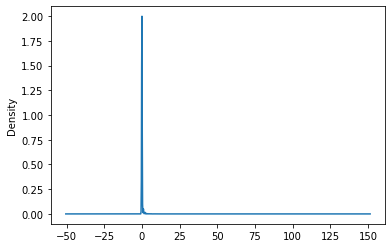

In [357]:
ax = df['Hate_Sonar'].plot.kde()

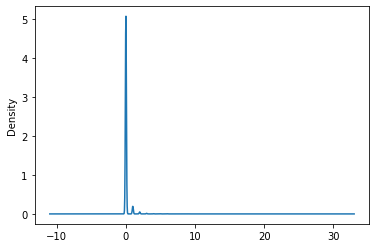

In [358]:
ax = df['Hate_Delimit'].plot.kde()

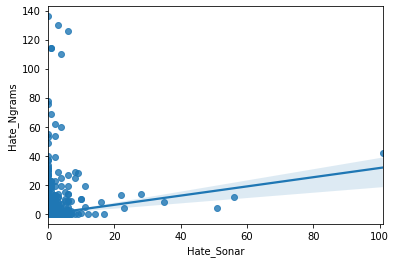

In [359]:
datas= df[['Hate_Sonar', 'Hate_Ngrams']]
ax = sns.regplot(x="Hate_Sonar", y="Hate_Ngrams", data=datas, robust=True,n_boot=10)

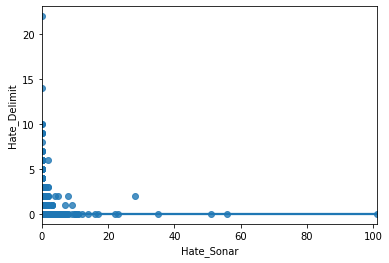

In [360]:
datas= df[['Hate_Sonar', 'Hate_Delimit']]
ax = sns.regplot(x="Hate_Sonar", y="Hate_Delimit", data=datas, robust=True,n_boot=10)

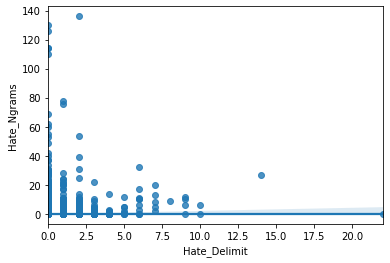

In [361]:
datas= df[['Hate_Delimit', 'Hate_Ngrams']]
ax = sns.regplot(x="Hate_Delimit", y="Hate_Ngrams", data=datas, robust=True, n_boot=10)

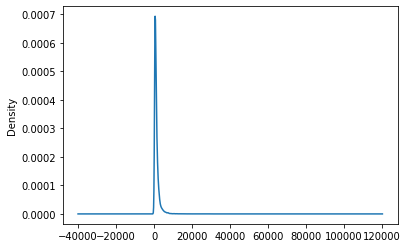

In [363]:
ax = df['Perplexity'].plot.kde()